# lab 4

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.linalg import inv 
from numpy.linalg import det
from sympy import *
from sympy.plotting.plot import List2DSeries 
from scipy.optimize import minimize 
from scipy.stats import multivariate_normal 
import sys 

## read the file 

In [2]:
data = pd.read_csv('binclass.txt', delimiter=',',header=None)
data

,0,1,2
0,4.5316,13.5610,1
1,8.1112,13.9300,1
2,15.5630,4.8348,1
3,14.7630,20.5850,1
4,14.3260,25.6140,1
...,...,...,...
395,21.6340,6.6954,-1
396,17.6630,12.9390,-1
397,16.5660,1.6164,-1
398,13.9300,9.1910,-1


## analysis on the file

In [3]:
data = data.values
print(data.shape)
data

(400, 3)


array([[ 4.5316, 13.561 ,  1.    ],
       [ 8.1112, 13.93  ,  1.    ],
       [15.563 ,  4.8348,  1.    ],
       ...,
       [16.566 ,  1.6164, -1.    ],
       [13.93  ,  9.191 , -1.    ],
       [21.882 ,  9.322 , -1.    ]])

## spliting the data into labels and features

In [4]:
X = data[:, :-1]
D = X.shape[1] 
Y = data[:, -1]

# TODO: Seperate the positive class
X_pos =  X[np.where(Y == 1)] # or just use >> X_pos =  X[Y == 1]
# TODO: Seperate the negative class
X_neg = X[np.where(Y == -1)]




In [5]:
pd_X = pd.DataFrame(X)
pd_X

,0,1
0,4.5316,13.5610
1,8.1112,13.9300
2,15.5630,4.8348
3,14.7630,20.5850
4,14.3260,25.6140
...,...,...
395,21.6340,6.6954
396,17.6630,12.9390
397,16.5660,1.6164
398,13.9300,9.1910


In [6]:
pd_X_positive = pd.DataFrame(X_pos)
pd_X_positive


,0,1
0,4.5316,13.5610
1,8.1112,13.9300
2,15.5630,4.8348
3,14.7630,20.5850
4,14.3260,25.6140
...,...,...
195,1.6329,15.6590
196,6.1069,17.7520
197,12.1900,13.7900
198,8.8631,16.5420


In [7]:
pd_X_neg = pd.DataFrame(X_neg)
pd_X_neg


,0,1
0,16.128,9.3093
1,22.774,5.1828
2,25.629,10.6510
3,21.310,8.6152
4,20.658,10.2960
...,...,...
195,21.634,6.6954
196,17.663,12.9390
197,16.566,1.6164
198,13.930,9.1910


In [8]:
pd_Y = pd.DataFrame(Y)
pd_Y

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
395,-1.0
396,-1.0
397,-1.0
398,-1.0


# case1: differnet covariances

In [9]:
def gaussian(theta, x):
    # TODO: Calculate Gaussian
    mu = theta[:D] 
    sigma = (theta[D] ** 2) * np.identity(D) 
    
    sigma_inv = inv(sigma)
    
    term = -0.5 * ((x-mu) @ sigma_inv @ (x-mu)) 
    term= np.exp(term)
    constant = 1 / (np.power((2 * np.pi), D) * np.linalg.det(sigma))  
    if constant*term != 0:
        return -np.log(constant*term) 
    else:
        return -np.log(constant*term + 0.00001)

In [10]:
def likelihood(theta, data):
    """
    Returns the final likelihood by summing up individual terms obtained from gaussian(). 
    """
    sum_term = 0
    # TODO: calculate likelihood
    for i in range(data.shape[0]): 
         sum_term = sum_term + gaussian(theta, data[i, :]) 
        
    return sum_term

In [11]:
def mle_solution(X, string):
    """
    Solves the optimization problem to find the mle estimate for given data and returns the optimal parameters.
    """

    mu_start=np.array([0.8] * D)
    sigma_start=np.array([1.5])
    
    model = minimize(fun=likelihood, x0=np.concatenate((mu_start,sigma_start)), args= X, method= 'L-BFGS-B',options={'disp':False})
    mu_opt= model.x[:D]
    sigma_opt= (model.x[D]**2)*np.identity(D)
    return mu_opt, sigma_opt

In [12]:
mu_1, sigma_1 = mle_solution(X_pos, 'positive class with different covariances:')
mu_2, sigma_2 = mle_solution(X_neg, 'negative class with different covariances:')
print('optimized soln of Xpositives: \n')
print('Mean of Xpositives:\n', mu_1,'\n\n', 'Covariance matrix of Xpositives:\n', sigma_1)
print('\n\n')
print('optimized soln of Xnegatives: \n')
print('Mean of Xnegatives:\n', mu_2, '\n\n', 'Covariance matrix of Xnegatves:\n', sigma_2)

optimized soln of Xpositives: 

Mean of Xpositives:
 [10.01143364 19.54949462] 

 Covariance matrix of Xpositives:
 [[13.30278131  0.        ]
 [ 0.         13.30278131]]



optimized soln of Xnegatives: 

Mean of Xnegatives:
 [20.32489768  9.68798314] 

 Covariance matrix of Xnegatves:
 [[4.75030519 0.        ]
 [0.         4.75030519]]


# case 2: same covariances

In [13]:
def likelihood_with_given_covariance(theta, data):
    sum_term = 0
    # TODO: calculate liklihood
    for i in range(data.shape[0]):
        sum_term = sum_term + gaussian_with_given_covariance(theta,data[i,:])
    return sum_term

In [14]:
def gaussian_with_given_covariance(theta,x):
    mu = theta[:D]
    #delta =
    sigma = (theta[D]**2)*np.identity(D) 
    
    sigma_inv = inv(sigma)
    
    term = -0.5*((x-mu)@sigma_inv@(x-mu))
    term= np.exp(term)
    
    constant = 1/(np.power((2*np.pi),D)*np.linalg.det(sigma))
    
    if constant*term != 0:
        return -np.log(constant*term)
    else:
        return -np.log(constant*term + 0.00001)

In [15]:
def mle_solution_with_given_covariance(X, string):
    mu_start=np.array([0.8]*D)
    sigma_start=np.array([1.5])
    
    model = minimize(fun=likelihood_with_given_covariance, x0=np.concatenate((mu_start,sigma_start)), args= X, method= 'L-BFGS-B',options={'disp':False})
    mu_opt= model.x[:D]
    sigma_opt= (model.x[D]**2)*np.identity(D)
    return mu_opt, sigma_opt

In [16]:
def get_avg_covar(sigma_1, sigma_2):
    sigma = np.zeros([D, D])
    print(sigma)
    row, col = sigma_1.shape
    for r in range(row):
        for c in range(col):
            sigma[r, c] = (sigma_1[r, c] + sigma_2[r, c]) / 2
    print(sigma)
    return sigma

In [17]:
mu_1, sigma_1 = mle_solution_with_given_covariance(X_pos, 'positive class with different covariances: ')
mu_2, sigma_2 = mle_solution_with_given_covariance(X_neg, 'negative class with different covariances: ')
sigma = get_avg_covar(sigma_1, sigma_2)
sigma_1 = sigma
sigma_2 = sigma
print('optimized soln of Xpositives: \n')
print('Mean of Xpos:\n', mu_1,'\n\n', 'Covar_mat of Xpositives:\n', sigma_1)
print('\n\n')
print('optimized soln of Xnegatives: \n')
print('Mean of Xnegatives:\n', mu_2, '\n\n', 'Covariance matrix of Xnegatives:\n', sigma_2)

[[0. 0.]
 [0. 0.]]
[[9.02654325 0.        ]
 [0.         9.02654325]]
optimized soln of Xpositives: 

Mean of Xpos:
 [10.01143364 19.54949462] 

 Covar_mat of Xpositives:
 [[9.02654325 0.        ]
 [0.         9.02654325]]



optimized soln of Xnegatives: 

Mean of Xnegatives:
 [20.32489768  9.68798314] 

 Covariance matrix of Xnegatives:
 [[9.02654325 0.        ]
 [0.         9.02654325]]


# plotting 

In [18]:
def initialize_plot():
    plt.figure(figsize=(15,12))
    plt.title('conditional probability distributions')
    plt.xlabel('first dim ')
    plt.ylabel('second dim ')

In [19]:
def consolidated_plot(X_pos, X_neg, same_cov=0):
    
    initialize_plot()
    ax = plt.gca()

    # Compute the meshgrid using numpy
    x = np.linspace(-5,35,500)
    y = np.linspace(-5,35,500)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    mu_1, sigma_1 = mle_solution(X_pos, 'positive class with different covariances: ')
    mu_2, sigma_2 = mle_solution(X_neg, 'negative class with different covariances: ')
    normal1 = multivariate_normal(mu_1, sigma_1)
    plt.plot(X_pos[:,0],X_pos[:,1], 'r+', label='Positive')
    plt.contour(X, Y, normal1.pdf(pos), 15, cmap=plt.cm.OrRd)
    normal2 = multivariate_normal(mu_2, sigma_2)
    plt.plot(X_neg[:,0],X_neg[:,1], 'b+', label='Negative')
    plt.contour(X, Y, normal2.pdf(pos), 10, cmap=plt.cm.PuBu)

    # Plot the decision boundaries
    p = normal1.pdf(pos) - normal2.pdf(pos)
    plt.contour(X, Y, p, levels=[0])

    plt.legend()
    plt.show()
    pass


In [20]:
def consolidated_plot_with_given_covariance(X_pos, X_neg, same_cov=0):
    initialize_plot()
    ax = plt.gca()

    # Compute the meshgrid using numpy
    x = np.linspace(-20,35,500)
    y = np.linspace(-30,35,500)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y

    # Get the solutions from optimization problems solved for positive and negative classes
    mu_1, sigma_1 = mle_solution_with_given_covariance(X_pos, 'positive class with different covariances:')
    mu_2, sigma_2 = mle_solution_with_given_covariance(X_neg, 'negative class with different covariances:')
    
    #function to make same Covar_matrix
    sigma_avg = get_avg_covar(sigma_1, sigma_2)
    sigma_1 = sigma_avg
    sigma_2 = sigma_avg


    # Plot the positive examples and contour of gaussian for positive examples
    normal1 = multivariate_normal(mu_1, sigma_1)
    plt.plot(X_pos[:,0],X_pos[:,1], 'r+', label='Positive')
    plt.contour(X, Y, normal1.pdf(pos), 15, cmap=plt.cm.OrRd)

   
    normal2 = multivariate_normal(mu_2, sigma_1)
    plt.plot(X_neg[:,0],X_neg[:,1], 'b+', label='Negative')
    plt.contour(X, Y, normal2.pdf(pos), 10, cmap=plt.cm.PuBu)


    # Plot the decision boundary
    p = normal1.pdf(pos) - normal2.pdf(pos)
    plt.contour(X, Y, p, levels=[0])

    plt.legend()
    plt.show()
    pass

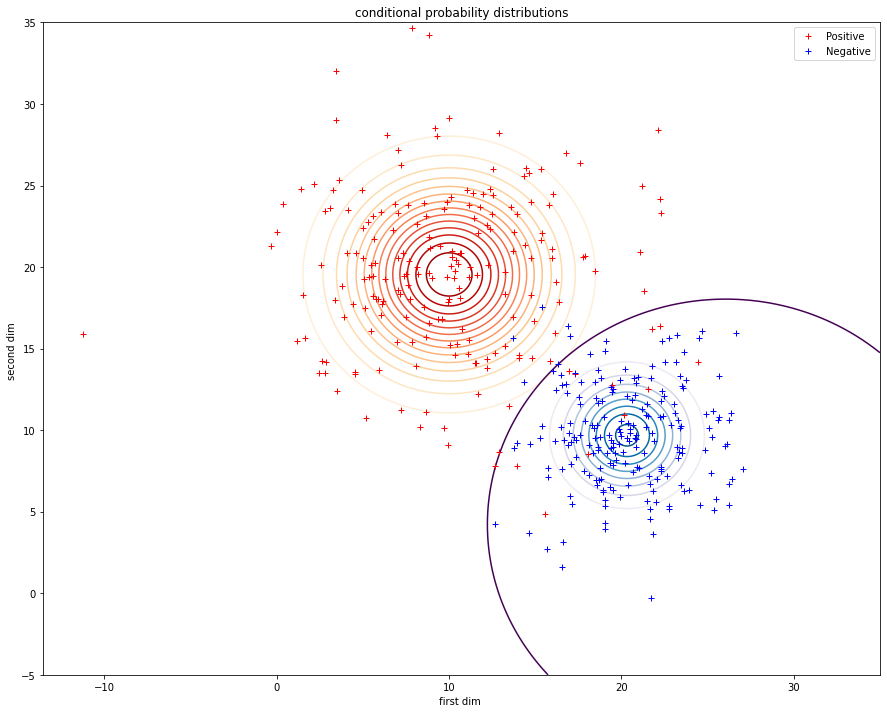

In [21]:
consolidated_plot(X_pos, X_neg)

[[0. 0.]
 [0. 0.]]
[[9.02654325 0.        ]
 [0.         9.02654325]]


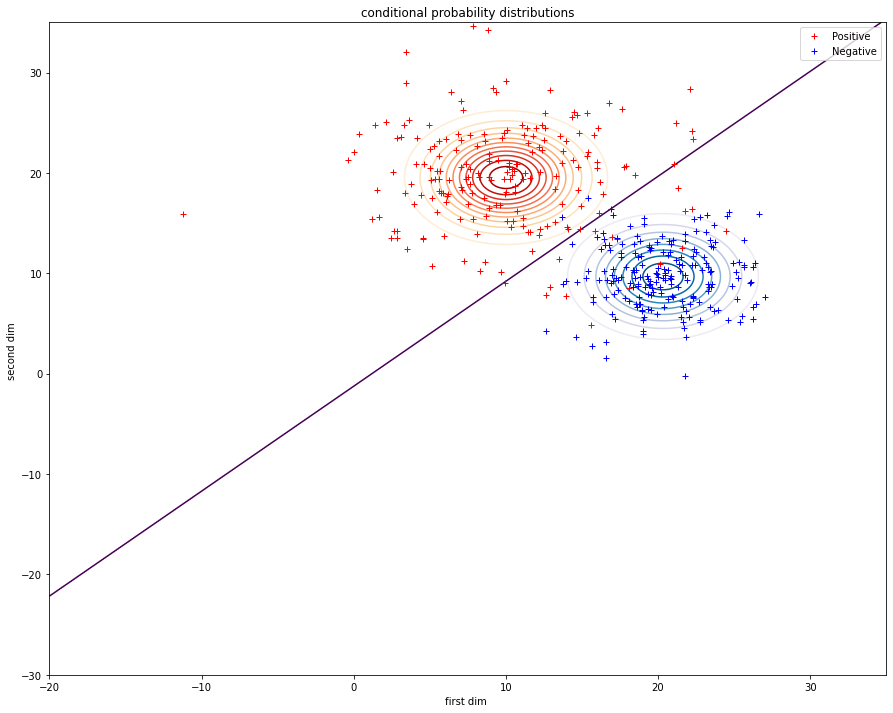

In [22]:
consolidated_plot_with_given_covariance(X_pos, X_neg)